# PCA

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris


In [3]:

def pca_steps(dataset):
    # Load the dataset from scikit-learn
    X = dataset.data
    y = dataset.target
    feature_names = dataset.feature_names
    target_names = dataset.target_names
    
    # Standardize the data
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_std[X_std == 0] = 1 # Avoid division by zero
    X_norm = (X - X_mean) / X_std
    
    # Perform PCA
    pca = PCA(n_components=X.shape[1])
    pca.fit(X_norm)
    eigenvalues = pca.explained_variance_
    eigenvectors = pca.components_
    
    # Plot the explained variance ratio
    plt.bar(np.arange(len(eigenvalues)) + 1, eigenvalues / np.sum(eigenvalues))
    plt.xlabel('Principal component')
    plt.ylabel('Explained variance ratio')
    plt.show()
    
    # Plot the eigenvectors
    plt.bar(np.arange(len(feature_names)), eigenvectors[0])
    plt.xticks(np.arange(len(feature_names)), feature_names, rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Eigenvector value')
    plt.show()
    
    # Transform the data
    X_transformed = pca.transform(X_norm)
    
    # Plot the transformed data
    for i in range(X.shape[1]):
        plt.scatter(X_transformed[:, i], y)
        plt.xlabel(f'Principal component {i+1}')
        plt.ylabel('Target')
        plt.show()


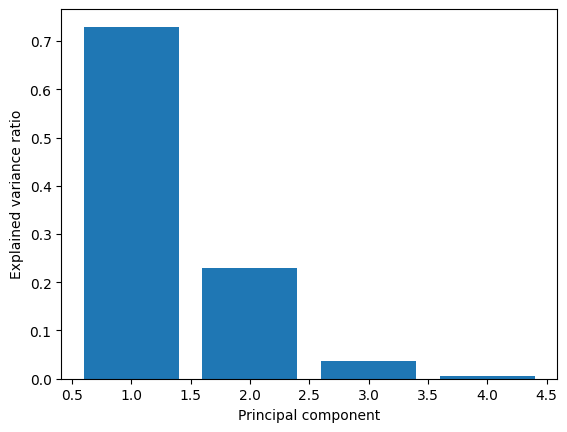

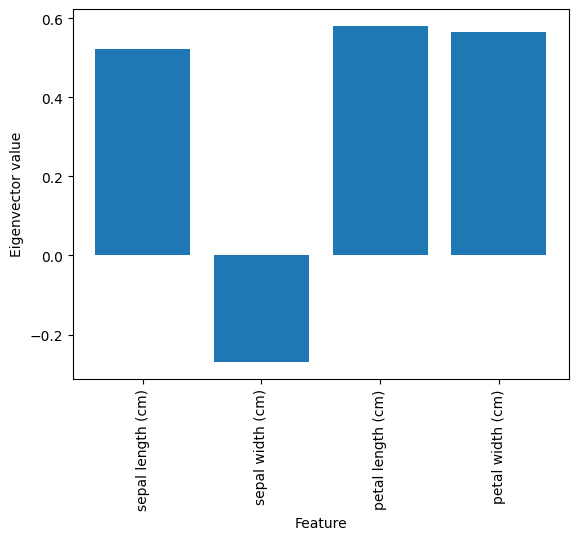

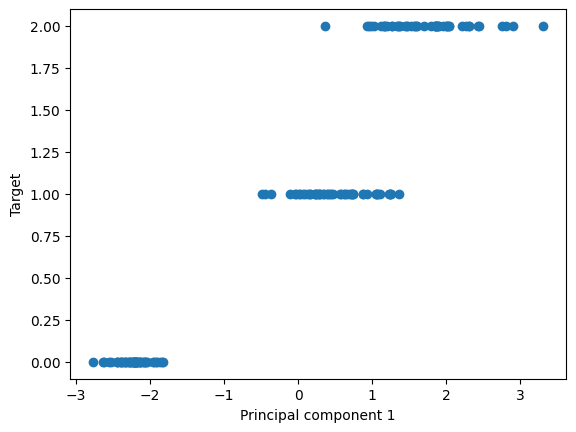

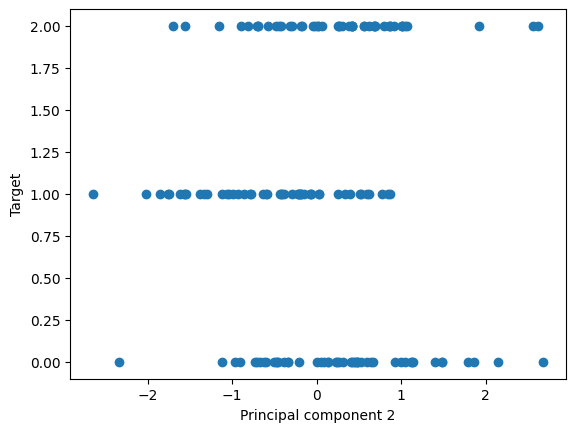

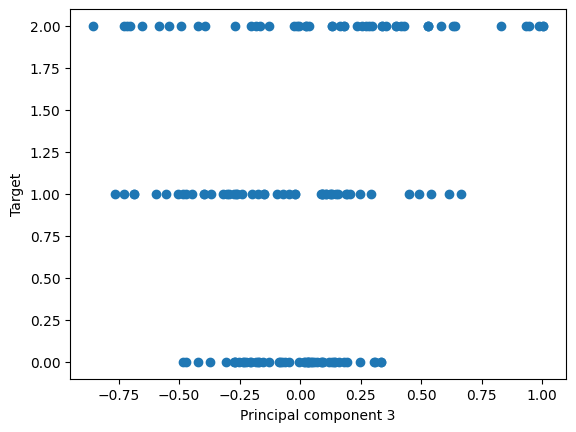

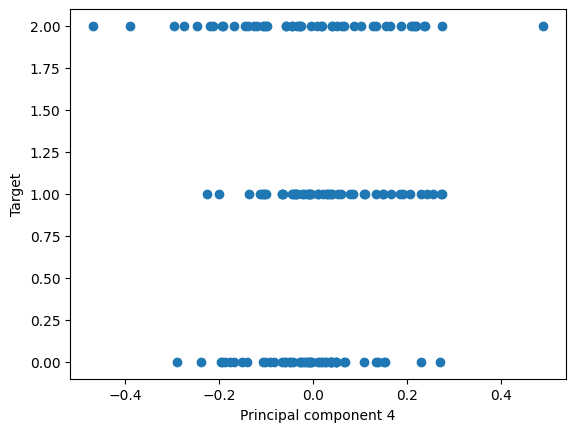

In [4]:
iris = load_iris()
pca_steps(iris)